In [2]:
import pandasai as pai

In [16]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [2]:
import pyodbc as odbc
import pandas as pd 

In [3]:
# DRIVER_NAME= 'SQL SERVER'
# SERVER_NAME= 'Eng-M-Hesham'
# DATABASE_NAME= 'ecommerce_db'

# connection_string = f""" 
#            DRIVER={DRIVER_NAME};
 #           SERVER={SERVER_NAME};
#            DATABASE=ecommerce_db;
#            Trust_Connection=yes;
  #          """ 
connection_string = (
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=Eng-M-Hesham;"
    "Database=ecommerce_db;"
    "UID=sa;"
    "PWD=mh2310;"
)


In [4]:
con = odbc.connect(connection_string)

In [5]:
print(con)

In [53]:
query = """

-- SQL for Weekly Sales Forecasting Dataset

SELECT 
    DATEPART(WEEK, o.order_date) AS sales_week,
    DATEPART(MONTH, o.order_date) AS sales_month,

    -- Total discounted revenue (net sales)
    SUM(
        CASE 
            WHEN d.id IS NOT NULL 
                 AND o.order_date BETWEEN d.start_date AND d.end_date
            THEN od.quantity * od.unit_price * (1 - d.percentage / 100.0)
            ELSE od.quantity * od.unit_price
        END
    ) AS total_revenue

FROM 
    orders o
JOIN 
    order_details od ON o.id = od.order_id
JOIN 
    products p ON od.product_id = p.id
LEFT JOIN 
    discounts d ON (d.product_id = p.id OR d.category_id = p.category_id)
                AND d.is_active = 1
LEFT JOIN 
    returns r ON o.id = r.order_id AND r.status != 'rejected'

WHERE 
    r.id IS NULL
    AND o.status != 'Cancelled'

GROUP BY 
    DATEPART(WEEK, o.order_date),
    DATEPART(MONTH, o.order_date)

ORDER BY 
    sales_month, sales_week;




"""
df = pd.read_sql(query, con)

In [54]:
df 

,sales_week,sales_month,total_revenue
0,1,1,1245621.54
1,2,1,2077770.17
2,3,1,2164942.52
3,4,1,2215020.38
4,5,1,1601930.36
5,5,2,302045.91
6,6,2,2121403.36
7,7,2,2372760.89
8,8,2,2272806.40
9,9,2,1574049.19


In [58]:
df['total_revenue'].sum()

37739885.559516996

In [9]:
import pandasai as pai
from pandasai.llm import BambooLLM

# Create the LLM instance with your API key
llm = BambooLLM(api_key="PAI-bf6b1fd3-0757-4aa6-ac4f-c8e0d79b8e53")

# In newer versions of pandasai, PandasAI is imported from pandasai.smart_dataframe
from pandasai.smart_dataframe import SmartDataframe

# Create a SmartDataframe instance instead of using PandasAI
# You would typically pass your dataframe to SmartDataframe like:
smart_df = SmartDataframe(df, config={"llm": llm})

# If you still need the PandasAI class specifically, you might need to install
# an older version of pandasai that supports it

In [51]:
smart_df.chat("what is the total amount")

Traceback (most recent call last):
  File "C:\Users\mh309\anaconda3\Lib\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "C:\Users\mh309\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "C:\Users\mh309\anaconda3\Lib\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "C:\Users\mh309\anaconda3\Lib\site-packages\pandasai\pipelines\chat\code_generator.py", line 33, in execute
    code = pipeline_context.config.llm.generate_code(input, pipeline_context)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mh309\anaconda3\Lib\site-packages\pandasai\llm\base.py", line 201, in generate_code
    response = self.call(instruction, context)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mh309\anaconda3\Lib\site-packages\pandasai\llm\b

'Unfortunately, I was not able to answer your question, because of the following error:\n\nUnauthorized\n'

In [65]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
# Import KernelRidge from scikit-learn
from sklearn.kernel_ridge import KernelRidge
# Import LinearSVR from scikit-learn
from sklearn.svm import LinearSVR 

# Example usage:
# 


In [77]:
df = df.iloc[:-2]
df

,sales_week,sales_month,total_revenue
0,1,1,1245621.54
1,2,1,2077770.17
2,3,1,2164942.52
3,4,1,2215020.38
4,5,1,1601930.36
5,5,2,302045.91
6,6,2,2121403.36
7,7,2,2372760.89
8,8,2,2272806.40
9,9,2,1574049.19


In [78]:
# Features and target
X = df[['sales_week','sales_month']]
y = df['total_revenue']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [63]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

In [64]:
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 18, number of used features: 0
[LightGBM] [Info] Start training from score 1696008.072917
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet th

In [45]:
# Model
model = LinearSVR(C=1.0, epsilon=0.1, dual=True)
model.fit(X_train, y_train)

LinearSVR(dual=True, epsilon=0.1)

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [80]:


# Prediction
y_pred = model.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")


RMSE: 984554906186.3734


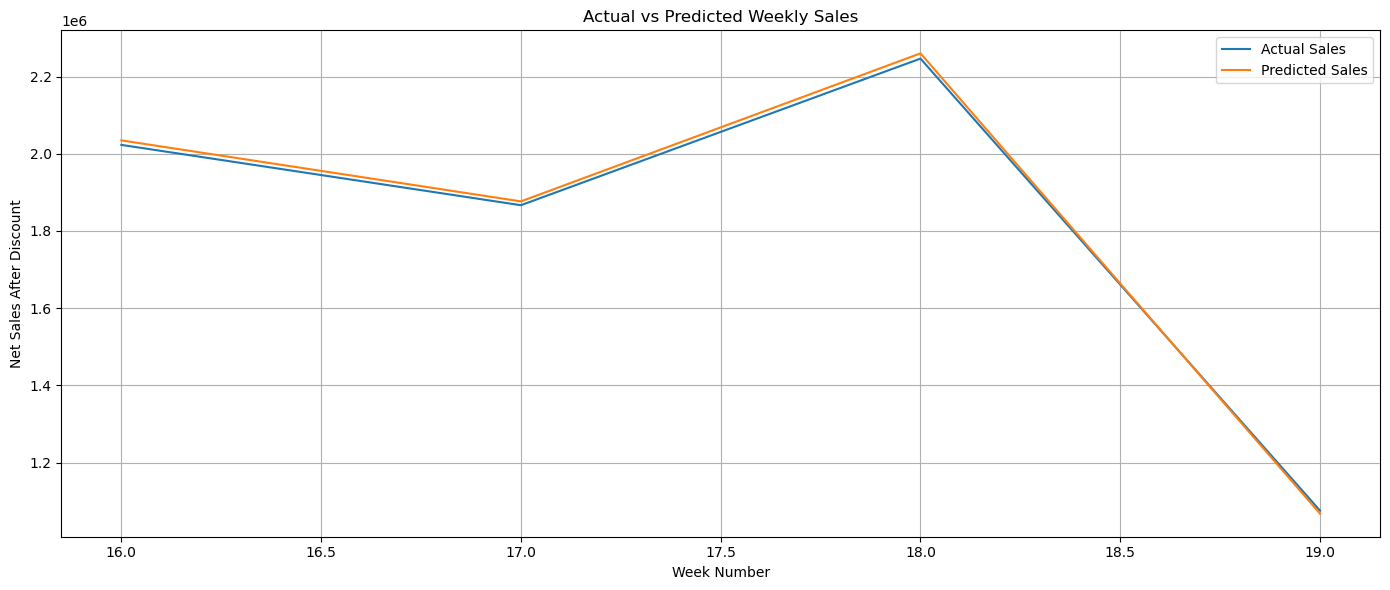

In [81]:
# First, let's update pandas and seaborn
# Run these in a separate cell:
# 
# 

# Then restart your kernel and run this code:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure your results dataframe is properly defined before this code
plt.figure(figsize=(14, 6))
sns.lineplot(data=results, x='sales_week', y='actual_sales', label='Actual Sales')
sns.lineplot(data=results, x='sales_week', y='predicted_sales', label='Predicted Sales')

plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Week Number')
plt.ylabel('Net Sales After Discount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [82]:
import pandas as pd

# If your last training data was week 20 of 2025

next_week = pd.DataFrame({
    'sales_week': [4],
    'sales_month': [6]
})


next_week_prediction = model.predict(next_week)
print(f"🔮 Predicted Sales for Week 21, 2025: {next_week_prediction[0]:.2f}")

🔮 Predicted Sales for Week 21, 2025: -3098826.62
